# Исследование объявлений о продаже квартир от сервиса Яндекс.Недвижимость

# Описание проекта

- Заказчик проекта — сервис Яндекс.Недвижимость

- Задача проекта — детализировать параметры для определения рыночной стоимости квартир в Санкт-Петербурге и соседних от него населенных пунктах. Это необходимо для последующей настройки автоматизированной системы, позволяющей выискивать аномалии и отслеживать мошенничечкую деятельность.

# Описание данных

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

Данные выданы в csv-файле. Датасет включает следующие поля:

- airports_nearest — расстояние до ближайшего аэропорта (м)
- balcony — количество балконов
- ceiling_height — высота потолков (м)
- cityCenters_nearest — расстояние до центра города (м)
- days_exposition — длительность размещения объявления от публикации до снятия, (дн)
- first_day_exposition — дата публикации
- floor — этаж
- floors_total — количество этажей в доме
- is_apartment — является ли квартира апартаментами (булев тип)
- kitchen_area — площадь кухни (м²)
- last_price — последняя цена (на момент снятия с публикации)
- living_area — жилая площадь (м²)
- locality_name — название населённого пункта
- open_plan — есть ли свободная планировка (булев тип)
- parks_around3000 — количество парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — количество водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- rooms — количество комнат
- studio — является ли квартира студией (булев тип)
- total_area — площадь квартиры (м²)
- total_images — количество фотографий квартиры в объявлении

# Содержание проекта


1. [Шаг 1. Загрузка датасета и подготовка его к анализу](#start)
    * [Вывод](#start_total)
2. [Шаг 2. Предобработка данных](#preprocessing) 
    * [Определение и изучение пропущенных значений](#null)
    * [Причины, которые могли привести к пропускам в данных](#reasons)
    * [Изменение типов данных](#float_to_int) 
    * [Обработка дубликатов](#duplicates) 
    * [Вывод](#preprocessing_total) 
3. [Шаг 3. Добавление данных в таблицу](#add_numbers) 
    * [Вывод](#add_numbers_total) 
4. [Шаг 4. Исследовательский анализ данных](#analisis)
    * [Вывод](#analisis_total) 
5. [Шаг 5. Общий вывод](#total)
6. [Чек-лист готовности проекта](#check_list)

### Шаг 1. Загрузка датасета и подготовка его к анализу <a id="start"></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


data = pd.read_csv('..., sep = '\t' )
data.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [2]:
# <получение общей информации о данных в таблице>
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [3]:
# <получение информации о пропусках в таблице>
data.isnull().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

#### Вывод <a id="start_total"></a>

Всего 23699 строк в таблице. Каждая строка содержит информацию о продаваемой в Санкт-Петербурге квартире.
Есть пропуски в столбцах: 

1. ceiling_height - высота потолков (м)
2. floors_total - всего этажей в доме
3. living_area - жилая площадь в квадратных метрах(м²)
4. is_apartment - апартаменты (булев тип)
5. kitchen_area - площадь кухни в квадратных метрах (м²)
6. balcony - число балконов
7. locality_name - название населённого пункта
8. airports_nearest - расстояние до ближайшего аэропорта в метрах (м)
9. cityCenters_nearest - расстояние до центра города (м)
10. parks_around3000 - число парков в радиусе 3 км
11. parks_nearest  - расстояние до ближайшего парка (м)
12. ponds_around3000  - число водоемов в радиусе 3 км
13. ponds_nearest - расстояние до ближайшего водоёма (м)           
14. days_exposition - сколько дней было размещено объявление (от публикации до снятия)

### Шаг 2. Предобработка данных <a id="preprocessing"></a>

#### Определение и изучение пропущенных значений <a id="null"></a>

In [4]:
# <Использование метода describe() для столбцов таблицы>
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Существуют пропуски в следующих столбцах:

   1. ceiling_height - высота потолков (м) 

- Много пропущенных значений, заполняем их медианой после удаления выбросов
- Максимальная высота потолков нормативными документами не оговаривается, но она явно не 100 метров, это выброс. Выбросы удаляем полностью, так как данных достаточно. Удаляем выбросы - потолки высотой больше 8 метров.
- Минимальной высотой потолков в России считается высота потолка 2,4 метра, соответственно все, что ниже является выбросами. Таких выбросов - 22.

In [5]:
# <Удаляем выбросы в столбце ceiling_height >

data = data.query('(ceiling_height >= 2.4 and ceiling_height <= 8) or ceiling_height != ceiling_height')

# <Проверка>
data['ceiling_height'].describe()

count    14457.000000
mean         2.728656
std          0.288144
min          2.400000
25%          2.520000
50%          2.650000
75%          2.800000
max          8.000000
Name: ceiling_height, dtype: float64

In [6]:
# <После удаления выбросов заполняем пропуски в столбце ceiling_height медианой, сгруппированной по количеству этажей>
# <Поскольку в столбце floors_total также есть пропуски, сначала заполняем их и удаляем выбросы>

# <Удаляем выбросы в столбце floors_total >
data = data.query('floors_total >= 2 and floors_total <= 40')
# <Выбросы удалены>
data['floors_total'].isnull().sum()

0

In [7]:
# <После удаления выбросов заполняем пропуски в столбце ceiling_height медианой, сгруппированной по количеству этажей>
data_groupby_floors_total = data.groupby(['floors_total'])['ceiling_height'].median()

def floors_total_func(row):
    floors_total = row['floors_total']
    ceiling_height = row['ceiling_height']
    
# <Создаем условие: если в столбце ceiling_height будет значение NAN, то в него вводится медианное значение, 
# которое посчитано для конкретного количества этажей в data_groupby_floors_total >
    if pd.isna(ceiling_height):
        row['ceiling_height'] = data_groupby_floors_total.loc[floors_total]
    return row

# < Применение метода apply() и параметра axis: со значением 1, чтобы применить метод ко всем строкам датафрейма >
data = data.apply(floors_total_func, axis = 1)
data['ceiling_height'].isnull().sum()

1

In [8]:
# <Заменяем последний пропуск медианным значением по столбцу>
data['ceiling_height'] = data['ceiling_height'].fillna(value = data['ceiling_height'].median())

# Проверка наличия пропусков
data['ceiling_height'].isnull().sum()

#Пропусков в столбце ceiling_height не осталось

0

  2. floors_total - всего этажей в доме

- Пропусков всего 86, можно заменить медианным значением по cityCenters_nearest
- Минимальное значение - одноэтажные дома, возможны, но являются выбросом, таких квартир всего 24 - удаляем
- Максимальное значение в 60 этажей - также является выбросом, еще одним выбросом является здание в 52 этажа. Принимаем за выброс значения больше 40.

In [9]:
# Проверка наличия пропусков - см. в ceiling_height
data['floors_total'].isnull().sum()

#Пропусков в столбце floors_total не осталось

0

In [10]:
# Используем коэффициент корреляции Пирсона для площади квартиры:
data[['total_area', 'rooms', 'living_area','kitchen_area' ]].corr()

,total_area,rooms,living_area,kitchen_area
total_area,1.000000,0.758531,0.939911,0.609473
rooms,0.758531,1.000000,0.846147,0.269927
living_area,0.939911,0.846147,1.000000,0.428862
kitchen_area,0.609473,0.269927,0.428862,1.000000


   3. living_area - жилая площадь в квадратных метрах(м²) 

- 1903 пропущенных значений. Заменяем пропуски медианным значением, расчитанным с помощью группировки по количеству комнат и и подсчета отношения жилой площади ко всей площади квартиры
- Минимальное значение - 2 метра, является выбросом. Площадь помещений в квартирах должна быть не менее: жилого помещения (комнаты) в однокомнатной квартире - 14 м.кв. СНиП 31-01-2003 Здания жилые многоквартирные http://docs.cntd.ru/document/1200035248. Учтем, что данные строительные нормы ввели в 2003 году и поставим выбросами кв с жилой площадью меньше 10.0 кв. м. 
- Максимальное значение в 409 метров является выбросом, считаем выбросами квартиры с площадью более 300 м.кв.

In [11]:
# <Удаляем выбросы в столбце living_area >
data = data.query('living_area >= 10 and living_area <= 300')

# <Проверка>
data['living_area'].describe()

# <Выбросы удалены>

count    21646.000000
mean        34.401559
std         21.309774
min         10.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        300.000000
Name: living_area, dtype: float64

In [12]:
# <Нашли коэффициент, равный отношению жилой площади ко всей площади квартиры>
data['living_k'] = data['living_area']/data['total_area']

# <Сгруппировали по количеству комнат и медианному значению вычисленного коэффициента>
living_k_median = data.groupby('rooms')['living_k'].median()

for room_num in living_k_median.index:
    data.loc[(data['living_area'].isnull()) & (data['rooms'] == room_num) , 'living_area'] = data.loc[(data['living_area'].isnull()& (data['rooms'] == room_num), 'total_area')] * living_k_median[room_num]

# Проверка наличия пропусков
data['living_area'].isnull().sum()

#Пропусков в столбце living_area не осталось

0

   4. is_apartment - апартаменты (булев тип)

- Большая часть значений пропущены, заменить их на значение False, поскольку неизвестно, являются ли эти здания апартаментами)

In [13]:
# <Удаляем выбросы в столбце is_apartment >
data['is_apartment'] = data['is_apartment'].fillna(value = False)

# Проверка наличия пропусков
data['is_apartment'].isnull().sum()

#Пропусков в столбце is_apartment не осталось

0

   5.  kitchen_area - площадь кухни в квадратных метрах (м²)

- Пропущено значений 2278, заполняем площадь кухни с помощью группировки в зависимости от количества комнат квартиры 
- Минимальная площадь кухни в однокомнатной квартире согласно СНиП 31-01-2003 Здания жилые многоквартирные должна быть не менее 5 м. Опять же учтем, что эти нормы действуют с 2003 года и поставим выбросы - кухни до 4 кв. м.
- Максимальная площадь не оговаривается в нормативных документах, ограничим площадью в 60 кв. м.

In [14]:
# <Удаляем выбросы в столбце kitchen_area >
data = data.query('kitchen_area >= 4 and kitchen_area <= 60')

# <Проверка>
data['kitchen_area'].describe()

# <Выбросы удалены>

count    20807.000000
mean        10.436538
std          5.356661
min          4.000000
25%          7.000000
50%          9.000000
75%         12.000000
max         60.000000
Name: kitchen_area, dtype: float64

In [15]:
# <Нашли коэффициент, равный отношению площади кухни к всей площади квартиры>
data['kitchen_k'] = data['kitchen_area']/data['total_area']

# <Сгруппировали по количеству комнат и медианному значению вычисленного коэффициента>
kitchen_k_median = data.groupby('rooms')['kitchen_area'].median()

for room_num in kitchen_k_median.index:
    data.loc[(data['kitchen_area'].isnull()) & (data['rooms'] == room_num) , 'kitchen_area'] = data.loc[(data['kitchen_area'].isnull()& (data['rooms'] == room_num), 'total_area')] * kitchen_k_median[room_num]

# Проверка наличия пропусков
data['kitchen_area'].isnull().sum()

#Пропусков в столбце kitchen_area не осталось

0

   6. balcony - число балконов 
    
- человек не указал число балконов — скорее всего, их нет, можно заменить пропуски на 0
- минимальное количество - 0, не является выбросом
- максимальное количество балконов - 5, это не выброс, так как такое количество балконов у 301 квартиры, не удаляем

In [16]:
# < Заменяем пропущенные значения на 0: клиент не указал количество балконов, потому что их не в квартире>
data['balcony'] = data['balcony'].fillna(value = 0)

# Проверка наличия пропусков
data['balcony'].isnull().sum()

#Пропусков в столбце balcony не осталось

0

7. locality_name - название населённого пункта - таких записей всего 49, можно их удалить

In [17]:
# <Удаляем пропуски в столбце locality_name >
data.dropna(subset = ['locality_name'], inplace = True)

# Проверка наличия пропусков

data['locality_name'].isnull().sum()
#Пропусков в столбце locality_name не осталось    

0

   8. airports_nearest - расстояние до ближайшего аэропорта в метрах (м) 

- Есть пропуски, но в дальнейшем нам это значение не понадобится - заполняем маркером 1 000 000

In [18]:
# <Заполняем пропуски в столбце airports_nearest маркером 1 000 000>
data.airports_nearest = data['airports_nearest'].fillna(value = 1000000)

# Проверка наличия пропусков
data['airports_nearest'].isnull().sum()
#Пропусков в столбце airports_nearest не осталось

0

   9. cityCenters_nearest - расстояние до центра города (м)
   
- Пропусков - 4607, не заполняем их с помощью маркеров 

In [19]:
# Проверка наличия пропусков
data['cityCenters_nearest'].isnull().sum()

4607

   10. parks_around3000 - число парков в радиусе 3 км 
   
- не самая важная для нас информация, заполняем медианой

In [20]:
# <Заполняем пропуски в столбце parks_around3000 медианой>
data['parks_around3000'] = data['parks_around3000'].fillna(value = data['parks_around3000'].median())

# Проверка наличия пропусков
data['parks_around3000'].isnull().sum()
#Пропусков в столбце parks_around3000 не осталось

0

   11. parks_nearest  - расстояние до ближайшего парка (м)
    
- заполняем медианой

In [21]:
# <Заполняем пропуски в столбце parks_nearest медианой>
data['parks_nearest'] = data['parks_nearest'].fillna(value = data['parks_nearest'].median())

# Проверка наличия пропусков
data['parks_nearest'].isnull().sum()
#Пропусков в столбце parks_nearest не осталось

0

   12. ponds_around3000 - число водоемов в радиусе 3 км

- заполняем медианой

In [22]:
# <Заполняем пропуски в столбце ponds_around3000 медианой>
data['ponds_around3000'] = data['ponds_around3000'].fillna(value = data['ponds_around3000'].median())

# Проверка наличия пропусков
data['ponds_around3000'].isnull().sum()
#Пропусков в столбце ponds_around3000 не осталось

0

   13. ponds_nearest - расстояние до ближайшего водоёма (м)
    
- заполняем медианой

In [23]:
# <Заполняем пропуски в столбце ponds_nearest медианой>
data['ponds_nearest'] = data['ponds_nearest'].fillna(value = data['ponds_nearest'].median())

# Проверка наличия пропусков
data['ponds_nearest'].isnull().sum()
#Пропусков в столбце ponds_nearest не осталось

0

   14. days_exposition - сколько дней было размещено объявление (от публикации до снятия) 
    
- объявления еще не закрыты, данные пропуски оставляем нетронутыми

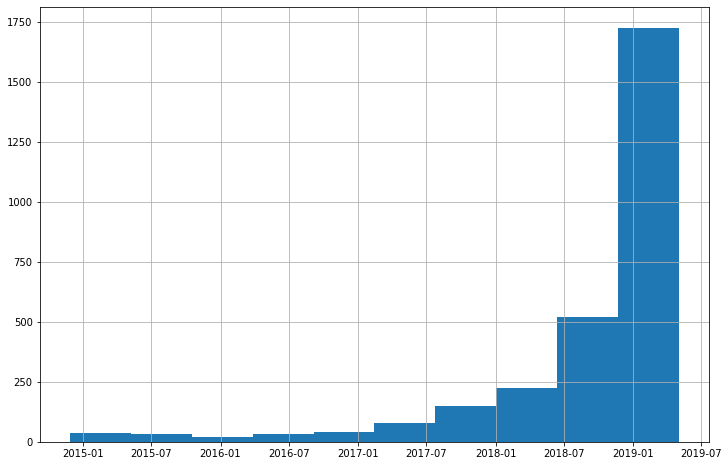

In [24]:
# График числа пропусков в длительности продажи в зависимости от даты. 
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'])

plt.figure(figsize=(12, 8))
data.query('days_exposition== "NaN"')['first_day_exposition'].hist()

Наблюдается резкий рост числа пропусков около даты выгрузки данных. С большой долей вероятности такие пропуски относятся к непроданным квартирам, а значит пропуски неслучайны и удалять их не следует.

In [25]:
# <Итоговая проверка пропусков>
data.isnull().sum()

#Пропусков в датасете кроме столбца days_exposition, который мы решили не заполнять, не осталось

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height             0
floors_total               0
living_area                0
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area               0
balcony                    0
locality_name              0
airports_nearest           0
cityCenters_nearest     4607
parks_around3000           0
parks_nearest              0
ponds_around3000           0
ponds_nearest              0
days_exposition         2860
living_k                   0
kitchen_k                  0
dtype: int64

#### Причины, которые могли привести к пропускам в данных <a id="reasons"></a>

1. ceiling_height - ошибка при выгрузке данных, вряд ли владельцы почти половины квартир не обращают внимание на высоту потолков
2. floors_total - возможно, пустые, незаполненные  объявления 
3. living_area - возможно, владелец объявления, не знал, какова площадь жилой площади
4. is_apartment - квартиры не являются апартаментами
5. kitchen_area - кухня совмещена с гостиной 
6. balcony - нет балконов
7. locality_name - ошибка при выгрузке данных или пустые объявления, потому что таких объявлений всего 50
8. airports_nearest - рядом нет аэропорта
9. cityCenters_nearest - квартира находится далеко от ближайшего города
10. parks_around3000 - рядом нет парков
11. parks_nearest - рядом нет парков
12. ponds_around3000 - рядом нет прудов 
13. ponds_nearest - рядом нет прудов
14. days_exposition - многие объявления еще не закрыты или закрыты автоматически

#### Изменение типов данных <a id="float_to_int"></a>

- Приводим столбец last_price к целочисленному типу для увеличения точности в рублях (копейки будут мешать при подсчете)
- Приводим столбец floors_total к целочисленному типу, поскольку не может быть 2.5 этажа в доме
- Приводим столбец balcony к целочисленному типу, поскольку не может быть 1.5 балкона в доме
- Приводим столбцы airports_nearest ... ponds_nearest к целочисленному типу для увеличения точности в км (метры будут мешать при подсчете)
- Приводим столбец days_exposition к целочисленному типу для увеличения точности в днях (часы и минуты будут мешать при подсчете)

In [26]:
# < Цикл для перевода в int c помощью метода astype>
list_of_columns = ['last_price', 'floors_total', 'balcony',  'airports_nearest', 'parks_around3000',  'parks_nearest', 'ponds_around3000', 'ponds_nearest']
for column in list_of_columns:
    data[column] = data[column].astype('int')
data.info()
# <Изменили тип данных в выбранных столбцах>

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20769 entries, 0 to 23698
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          20769 non-null  int64         
 1   last_price            20769 non-null  int32         
 2   total_area            20769 non-null  float64       
 3   first_day_exposition  20769 non-null  datetime64[ns]
 4   rooms                 20769 non-null  int64         
 5   ceiling_height        20769 non-null  float64       
 6   floors_total          20769 non-null  int32         
 7   living_area           20769 non-null  float64       
 8   floor                 20769 non-null  int64         
 9   is_apartment          20769 non-null  bool          
 10  studio                20769 non-null  bool          
 11  open_plan             20769 non-null  bool          
 12  kitchen_area          20769 non-null  float64       
 13  balcony         

#### Обработка дубликатов <a id="duplicates"></a>

In [27]:
# <получение суммарного количества дубликатов в таблице >
data.duplicated(keep = False).sum()

# <Автоматическая обработка дубликатов не выявила>

0

In [28]:
# <Проверяем на дубликаты столбцы типа object>
list_of_columns = ['first_day_exposition', 'is_apartment', 'locality_name']
for column in list_of_columns:
    print(data[column].value_counts())

2018-02-01    319
2017-11-10    221
2017-10-13    113
2017-09-27    101
2018-03-26     92
             ... 
2015-03-02      1
2016-12-30      1
2015-12-30      1
2017-01-01      1
2015-09-02      1
Name: first_day_exposition, Length: 1475, dtype: int64
False    20741
True        28
Name: is_apartment, dtype: int64
Санкт-Петербург          13950
посёлок Мурино             399
посёлок Шушары             391
Всеволожск                 356
Пушкин                     333
                         ...  
деревня Пельгора             1
посёлок станции Свирь        1
деревня Лупполово            1
деревня Ям-Тесово            1
поселок Кирпичное            1
Name: locality_name, Length: 342, dtype: int64


In [29]:
# <Проверяем вручную на дубли столбец locality_name>
data['locality_name'] = data['locality_name'].str.lower()
data['locality_name'] = data['locality_name'].replace(regex= 'ё', value='е')
data['locality_name'].value_counts()

санкт-петербург                      13950
поселок мурино                         427
поселок шушары                         391
всеволожск                             356
пушкин                                 333
                                     ...  
деревня кисельня                         1
поселок дружноселье                      1
поселок ленинское                        1
поселок барышево                         1
садовое товарищество приладожский        1
Name: locality_name, Length: 308, dtype: int64

Удалили вручную дубли в столбце locality_name, образовавшиеся из-за буквы Ё в слове посёлок.  Удалили 34 дубля.

#### Вывод <a id="preprocessing_total"></a>

В этой части проекта выявили пропуски в 14 столбцах.
В зависимости от того, насколько важны данные для ответов на вопросы, заполняли пропуски медианой или медианой, посчитанной на основе группировки по коррелирующему столбцу. Заключительная проверка показала отсутствие пропусков в таблице data.

Заменили тип данных float на int в столбцах, чтобы не получалось 1.5 балкона, а также для увеличения точности расчетов.

Автоматический поиск дубликатов не показал, вручную были выявлены и удалены дубликаты с буквами Ё и Е в слове "поселок".
Скорее всего дубликаты в столбцах были получены вследствие ручного набора данных, а не выбора значений из выпадающих списков.

### Шаг 3. Добавление данных в таблицу <a id="add_numbers"></a>

1. Посчитать и добавить в таблицу цену квадратного метра:

In [30]:
# <Добавляем столбец price_m2, полученный при делении цены на общую площадь квартиры >
data['price_m2'] = data['last_price']/data['total_area']
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,living_k,kitchen_k,price_m2
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,18863,16028.0,1,482,2,755,NaN,0.472222,0.231481,120370.370370
1,7,3350000,40.4,2018-12-04,1,2.75,11,18.6,1,False,...,12817,18603.0,0,453,0,503,81.0,0.460396,0.272277,82920.792079
2,10,5196000,56.0,2015-08-20,2,2.55,5,34.3,4,False,...,21741,13933.0,1,90,2,574,558.0,0.612500,0.148214,92785.714286
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,31856,8098.0,2,112,1,48,121.0,0.320000,0.410000,100000.000000
5,10,2890000,30.4,2018-09-10,1,2.65,12,14.4,5,False,...,1000000,NaN,0,453,0,503,55.0,0.473684,0.299342,95065.789474


2. Посчитать и добавить в таблицу день недели, месяц и год публикации объявления:

In [31]:
# <Добавляем столбец с днем недели>
data['weekday'] = data['first_day_exposition'].dt.weekday 

# <Добавляем столбец с месяцем>
data['month'] = data['first_day_exposition'].dt.month

# <Добавляем солбец с годом>
data['year'] = data['first_day_exposition'].dt.year 

data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,living_k,kitchen_k,price_m2,weekday,month,year
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,482,2,755,NaN,0.472222,0.231481,120370.370370,3,3,2019
1,7,3350000,40.4,2018-12-04,1,2.75,11,18.6,1,False,...,453,0,503,81.0,0.460396,0.272277,82920.792079,1,12,2018
2,10,5196000,56.0,2015-08-20,2,2.55,5,34.3,4,False,...,90,2,574,558.0,0.612500,0.148214,92785.714286,3,8,2015
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,112,1,48,121.0,0.320000,0.410000,100000.000000,1,6,2018
5,10,2890000,30.4,2018-09-10,1,2.65,12,14.4,5,False,...,453,0,503,55.0,0.473684,0.299342,95065.789474,0,9,2018


3. Посчитать и добавить в таблицу этаж квартиры; варианты — первый, последний, другой:

In [32]:
# < Создаем столбец с категоризацией по этажу квартиры >

def floor_category(row):
    if row['floor'] == 1:
        return 'первый'
    if row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'

data['floor_category'] = data.apply(floor_category,  axis = 1)

floor_dict = data[['floor','floor_category']]
floor_dict['floor_category'].value_counts()


другой       15276
последний     2968
первый        2525
Name: floor_category, dtype: int64

4. Посчитать и добавить в таблицу соотношение жилой и общей площади, а также отношение площади кухни к общей:

In [33]:
# <Эти столбцы были добавлены при заполнении пропусков в столбцах living_area и kitchen_area
data_dict = data[['living_k','kitchen_k']]
data_dict.head()

,living_k,kitchen_k
0,0.472222,0.231481
1,0.460396,0.272277
2,0.612500,0.148214
4,0.320000,0.410000
5,0.473684,0.299342


### Вывод <a id="add_numbers_total"></a>

1. Добавили столбец price_m2, поделив цену квартиры на общую площадь квартиры
2. Посчитали и добавили в таблицу столбцы с днем недели, месяцем и годом публикации объявления с помощью метода to_datetime()
3. Провели категоризации по этажу квартиры и добавили ее в столбце floor_category
4. Нашли уже созданные коэффициенты, показывающие соотношение жилой и общей площади (living_k) и отношение площади кухни к общей площади (kitchen_k).

### Шаг 4. Исследовательский анализ данных <a id="analisis"></a>

Изучите следующие параметры: 
1. Площадь, цена, число комнат, высота потолков. Постройте гистограммы для каждого параметра.

In [34]:
# <используем цикл для выведения основных стат. данных по 4 столбцам>
hist_list_of_columns = ['total_area', 'last_price', 'rooms',  'ceiling_height'] 
for column in hist_list_of_columns: 
    print(column, data[column].describe())
    print()

total_area count    20769.000000
mean        60.233405
std         32.478363
min         20.000000
25%         40.500000
50%         52.200000
75%         70.000000
max        491.000000
Name: total_area, dtype: float64

last_price count    2.076900e+04
mean     6.399885e+06
std      8.557888e+06
min      1.219000e+04
25%      3.500000e+06
50%      4.700000e+06
75%      6.800000e+06
max      4.013000e+08
Name: last_price, dtype: float64

rooms count    20769.000000
mean         2.093312
std          1.056183
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

ceiling_height count    20769.000000
mean         2.706640
std          0.238767
min          2.400000
25%          2.550000
50%          2.650000
75%          2.750000
max          8.000000
Name: ceiling_height, dtype: float64



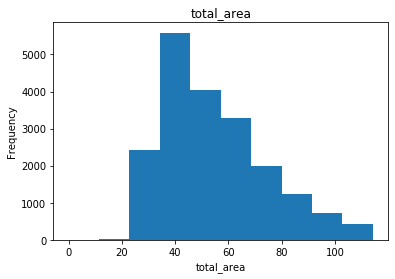

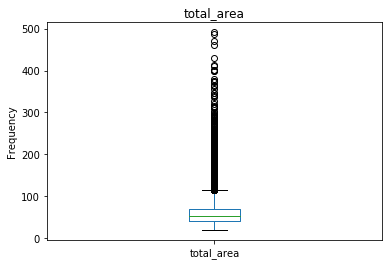

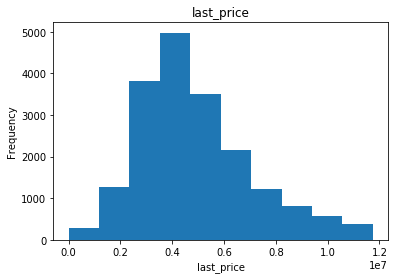

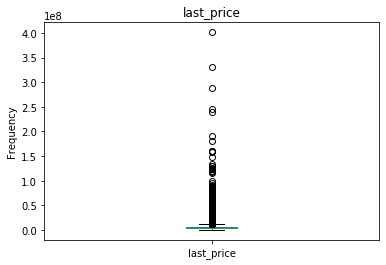

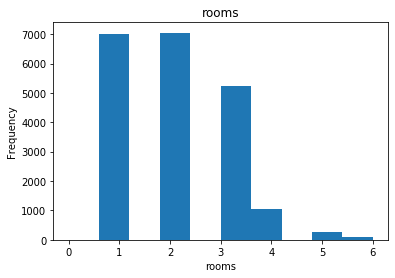

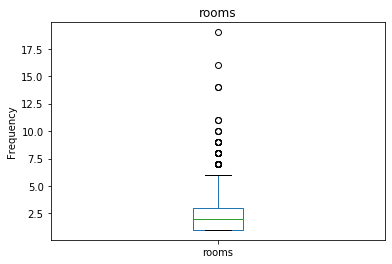

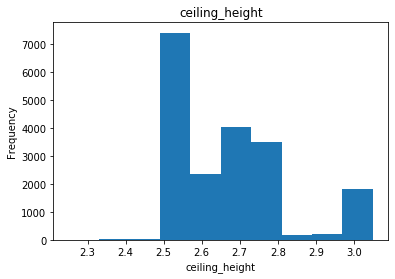

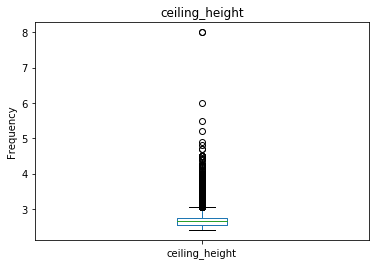

In [35]:
def hist_boxplot(column, title, data):
    quantiles = data[column].quantile([0.25, 0.75])
    iqr = quantiles.iloc[1] - quantiles.iloc[0]
    range_x = max(0, quantiles.iloc[0] - 1.5 * iqr), quantiles.iloc[1] + 1.5 * iqr
    data[column].plot( kind='hist', range = range_x, title= title)
    plt.xlabel(column)
    plt.show()
    
    data[column].plot( kind='box', title= title)
    plt.ylabel('Frequency')
    plt.show()

hist_list_of_columns = ['total_area', 'last_price', 'rooms',  'ceiling_height'] 
for column in hist_list_of_columns:
    hist_boxplot(column, column, data)

2. Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?

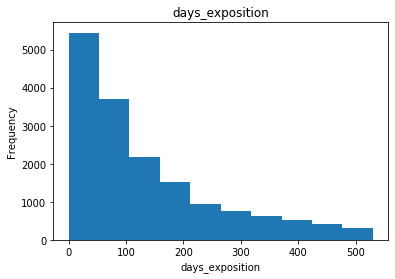

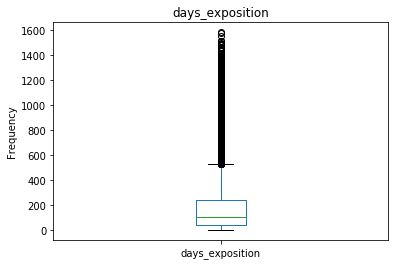

In [36]:
# <с помощью функции hist_boxplot строю гистограмму и диаграмму размаха>
hist_boxplot('days_exposition','days_exposition',data)

In [37]:
# <Считаем среднее и медиану>
data['days_exposition'].describe()

count    17909.000000
mean       185.546876
std        222.154591
min          1.000000
25%         45.000000
50%        102.000000
75%        239.000000
max       1580.000000
Name: days_exposition, dtype: float64

- На гистограмме четко видно распределение Пуассона.
- В среднем продажа занимает 102 дня (согласно медиане) или от 45 до 239 дней.
- Достаточно странно, что объявление о продаже висело всего 1 день, поскольку для продажи квартиры необходимо как минимум договориться о просмотре квартиры, также странно, что квартира продавалась 1580 день, то больше 4 лет. Рассмотрим подробнее эти значения.

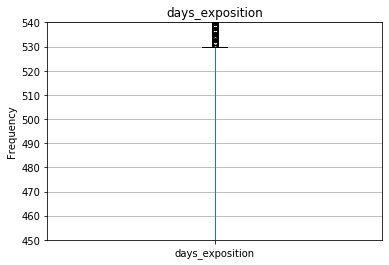

In [38]:
# <Рассмотрим days_exposition подробнее>

plt.ylim(450, 540)
plt.title('days_exposition')
plt.ylabel('Frequency')
data.boxplot('days_exposition')

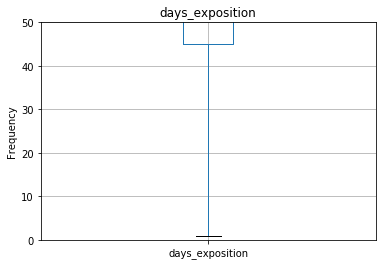

In [39]:
# <Рассмотрим days_exposition подробнее>
plt.ylim(0, 50)
plt.title('days_exposition')
plt.ylabel('Frequency')
data.boxplot('days_exposition')

Значения days_exposition больше 530 дней можно считать выбросами, поскольку они не входят в ориентировочную границу нормального размаха.
Однако значения days_exposition меньше 10 дней входят в 1,5 межквартильных размаха, а медиана стремится к длинному хосту низких значений, поэтому эти значения нельзя назвать выбросом.

Таким образом можно сказать, что продажи прошли быстро, если объявление закрыто за 45 дней и меньше, продажи прошли медленно - если объявление закрыто за время от 239 до 530 дней.

3. Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили. 

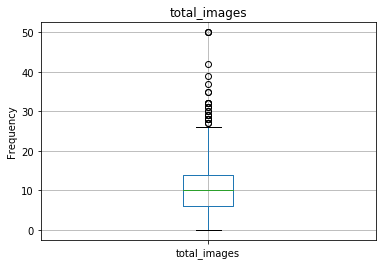

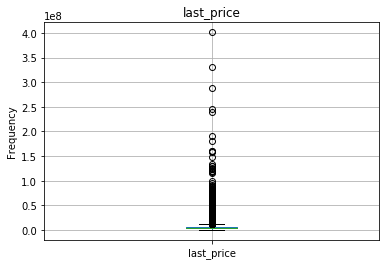

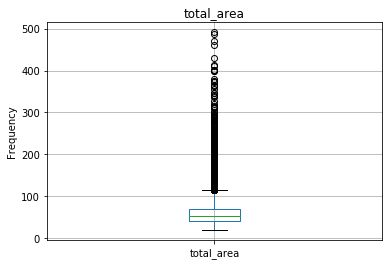

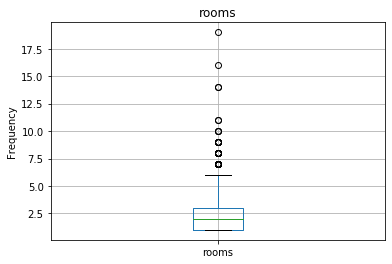

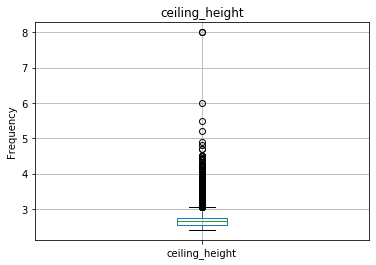

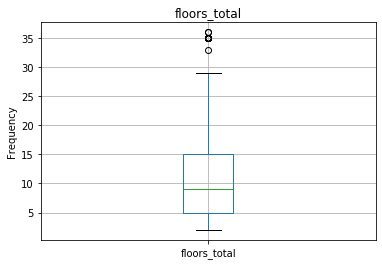

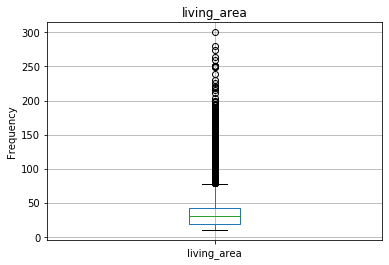

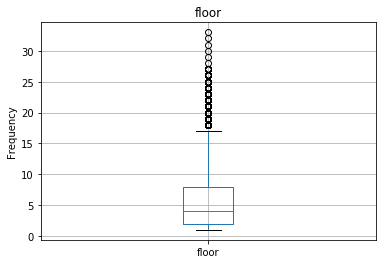

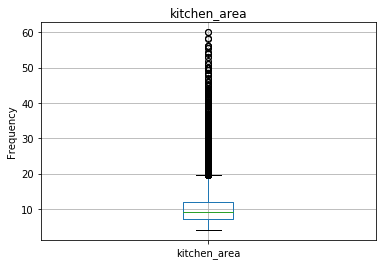

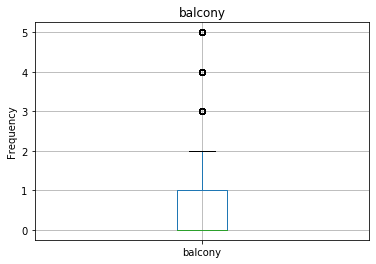

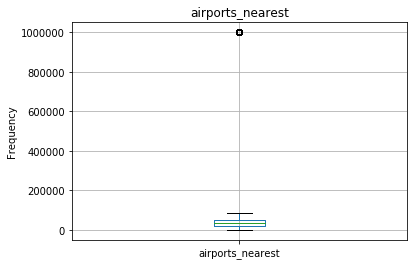

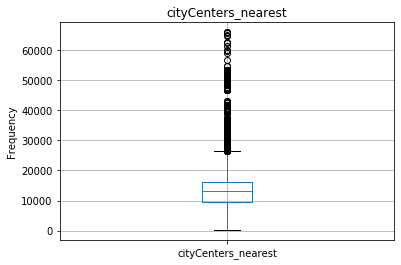

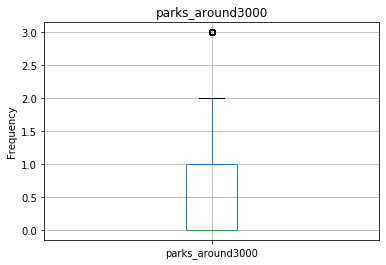

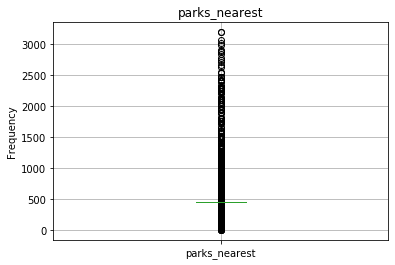

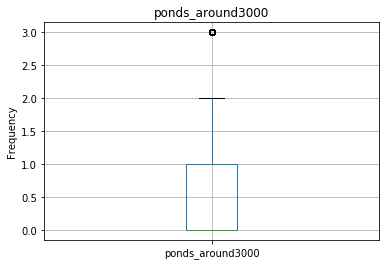

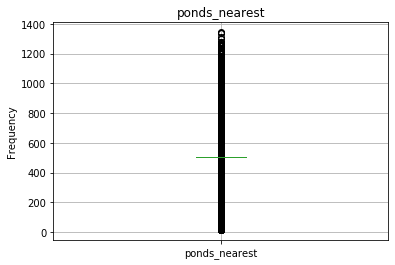

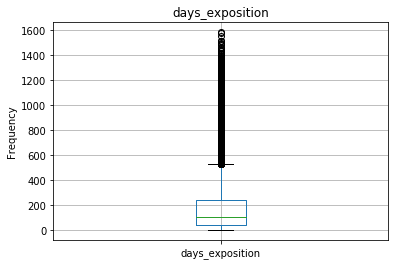

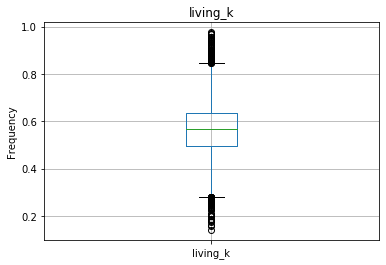

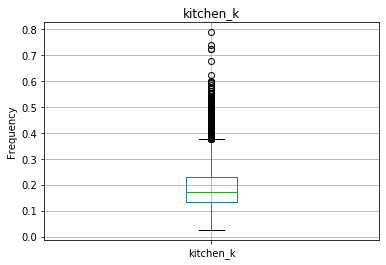

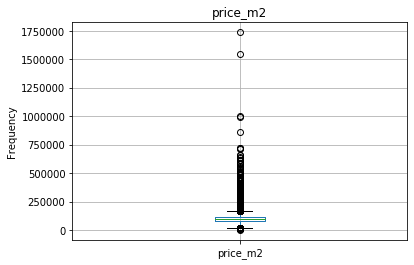

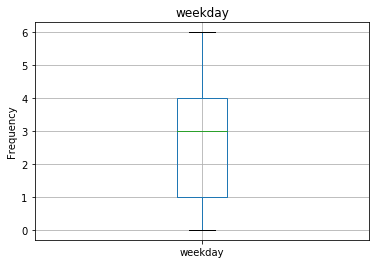

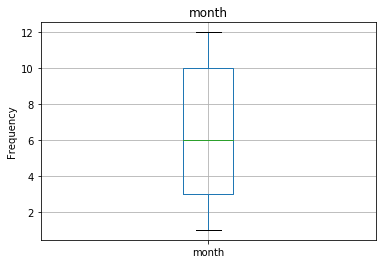

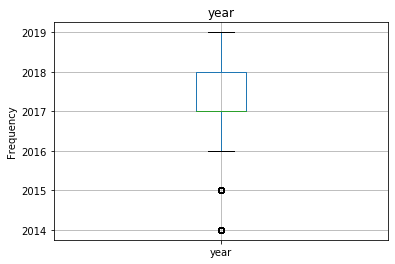

In [40]:
# <Используем boxplot для создания диаграмм размаха следующих столбцов >
list_of_columns = ['total_images', 'last_price', 'total_area','rooms', 'ceiling_height', 'floors_total', 'living_area', 
'floor','kitchen_area', 'balcony', 'airports_nearest', 'cityCenters_nearest', 'parks_around3000', 'parks_nearest', 
'ponds_around3000','ponds_nearest','days_exposition','living_k','kitchen_k','price_m2','weekday','month','year']
for column in list_of_columns:
    data.boxplot(column)
    plt.title(column)
    plt.ylabel('Frequency')
    plt.show()


In [41]:
# <Удаляем выбросы в выбранных числовых столбцах>

#'total_images' - есть выбросы, приблизительно больше 25 фотографий, не удаляю, поскольку эти данные не нужны для ответов на вопросы

#'last_price' - есть выбросы, удаляю выбросы больше 100 млн
data = data.query('last_price <= 100000000')

#'total_area' - есть выбросы, удаляю квартиры больше 300 метров, поскольку по диаграмме размаха снижается количество точек именно с 300 метров
data = data.query('total_area <= 300')

#'rooms' - есть выброс - очень мало квартир с количеством комнат больше 7, удаляю
data = data.query('rooms <= 7')

#'ceiling_height' - есть выбросы - квартиры с потолками в 4 метра, например двух-трехэтажные, удаляю выбросы выше 4,5 метров
data = data.query('ceiling_height <= 4.5')

#'floors_total' - есть выбросы, удаляю выше 30 этажей
data = data.query('floors_total <= 30')

#'living_area' - есть выбросы, удаляю квартиры с площадью больше 200 метров, поскольку по диаграмме размаха снижается количество точек именно с 200 метров
data = data.query('living_area <= 200')

#'floor' - выбросы есть с 17 этажа, но не трогаю, поскольку снизила количество этажей до 30

#'kitchen_area' - есть выбросы, удаляю кухни больше 45 метров, поскольку по диаграмме размаха снижается количество точек именно с 45 метров
data = data.query('kitchen_area <= 45')

#'balcony' - есть выбросы, удаляю объявления с количеством балконов больше 2
data = data.query('balcony <= 2')

#'cityCenters_nearest' - есть выбросы - не удаляю, поскольку есть пропуски

#'airports_nearest','parks_around3000','parks_nearest','ponds_around3000','ponds_nearest':
# - не трогаю, потому что не нужны для ответов на вопросы 

#'days_exposition' - есть выбросы - не удаляю, поскольку есть пропуски

#'living_k' - есть выбросы и ниже и выше, удаляю меньше 0,2 и больше 0,9
data = data.query('living_k >= 0.2 and living_k <= 0.9')

#'kitchen_k' - есть выбросы, удаляю больше 0,5
data = data.query('kitchen_k <= 0.5')

#'price_m2' - есть выбросы, удаляю больше 500000 за кв.м.
data = data.query('price_m2 <= 500000')

#'weekday', 'month' - выбросов нет
#'year' - выбросы до 2016 года, удаляю
data = data.query('year >= 2016')
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,living_k,kitchen_k,price_m2,weekday,month,year
count,18932.000000,1.893200e+04,18932.000000,18932.000000,18932.000000,18932.000000,18932.000000,18932.000000,18932.000000,18932.000000,...,18932.000000,18932.000000,18932.000000,16280.000000,18932.000000,18932.000000,18932.000000,18932.000000,18932.000000,18932.000000
mean,10.173885,5.915984e+06,58.134386,2.045320,2.699774,10.523241,33.349140,5.796905,10.119099,0.528523,...,464.837788,0.575322,512.303190,153.097789,0.562831,0.186699,97311.703607,2.555356,6.342225,2017.499155
std,5.630889,5.288381e+06,27.907711,0.997941,0.224440,6.440574,18.598208,4.759118,4.712934,0.762465,...,197.029343,0.868624,170.108514,169.657434,0.101145,0.068781,38196.980873,1.787670,3.438939,0.876175
min,0.000000,1.219000e+04,20.000000,1.000000,2.400000,2.000000,10.000000,1.000000,4.000000,0.000000,...,1.000000,0.000000,13.000000,1.000000,0.201194,0.025381,111.834862,0.000000,1.000000,2016.000000
25%,6.000000,3.450000e+06,40.000000,1.000000,2.550000,5.000000,18.500000,2.000000,7.000000,0.000000,...,453.000000,0.000000,503.000000,41.000000,0.493827,0.134146,76739.597333,1.000000,3.000000,2017.000000
50%,10.000000,4.600000e+06,51.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.000000,0.000000,...,453.000000,0.000000,503.000000,92.000000,0.566667,0.173077,94721.547500,3.000000,6.000000,2017.000000
75%,14.000000,6.550000e+06,67.700000,3.000000,2.750000,15.000000,41.900000,8.000000,11.500000,1.000000,...,453.000000,1.000000,503.000000,200.000000,0.634903,0.232432,113017.014868,4.000000,9.000000,2018.000000
max,50.000000,9.500000e+07,300.000000,7.000000,4.500000,29.000000,200.000000,27.000000,45.000000,2.000000,...,3190.000000,3.000000,1344.000000,1153.000000,0.900000,0.500000,500000.000000,6.000000,12.000000,2019.000000


In [42]:
print('Было удалено', 20769-18932, 'выбросов, которые составляют', (20769-18932)/20769*100,'% от первично обработанных выбросов, что входит в 5-10% возможных для удаления данных')

Было удалено 1837 выбросов, которые составляют 8.844913091626944 % от первично обработанных выбросов, что входит в 5-10% возможных для удаления данных


4. Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от площади, числа комнат, удалённости от центра. Изучите зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучите зависимость от даты размещения: дня недели, месяца и года.


In [43]:
# Используем коэффициент корреляции Пирсона для стоимости квартиры:
data[['last_price', 'total_area', 'rooms', 'cityCenters_nearest']].corr()

,last_price,total_area,rooms,cityCenters_nearest
last_price,1.000000,0.766678,0.481098,-0.315092
total_area,0.766678,1.000000,0.794109,-0.249488
rooms,0.481098,0.794109,1.000000,-0.185661
cityCenters_nearest,-0.315092,-0.249488,-0.185661,1.000000


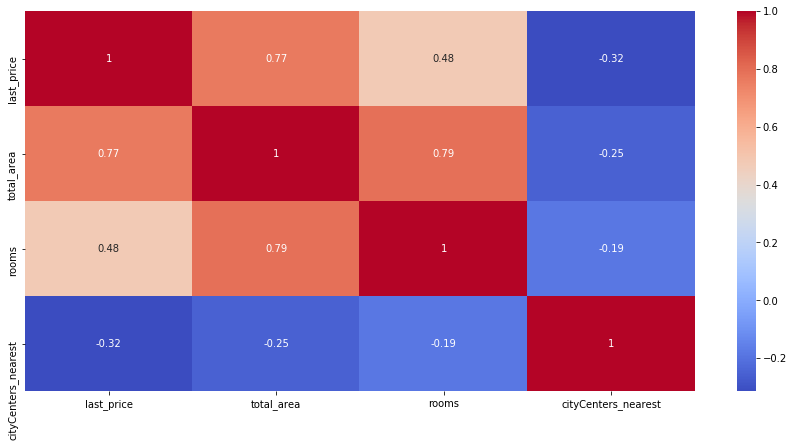

In [44]:
# <строим heatmap для визуализации корреляции>
plt.figure(figsize = (15,7))
sns.heatmap(data[['last_price', 'total_area', 'rooms', 'cityCenters_nearest']].corr(), annot = True, cmap= 'coolwarm')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FC82DD8248>,
      dtype=object)

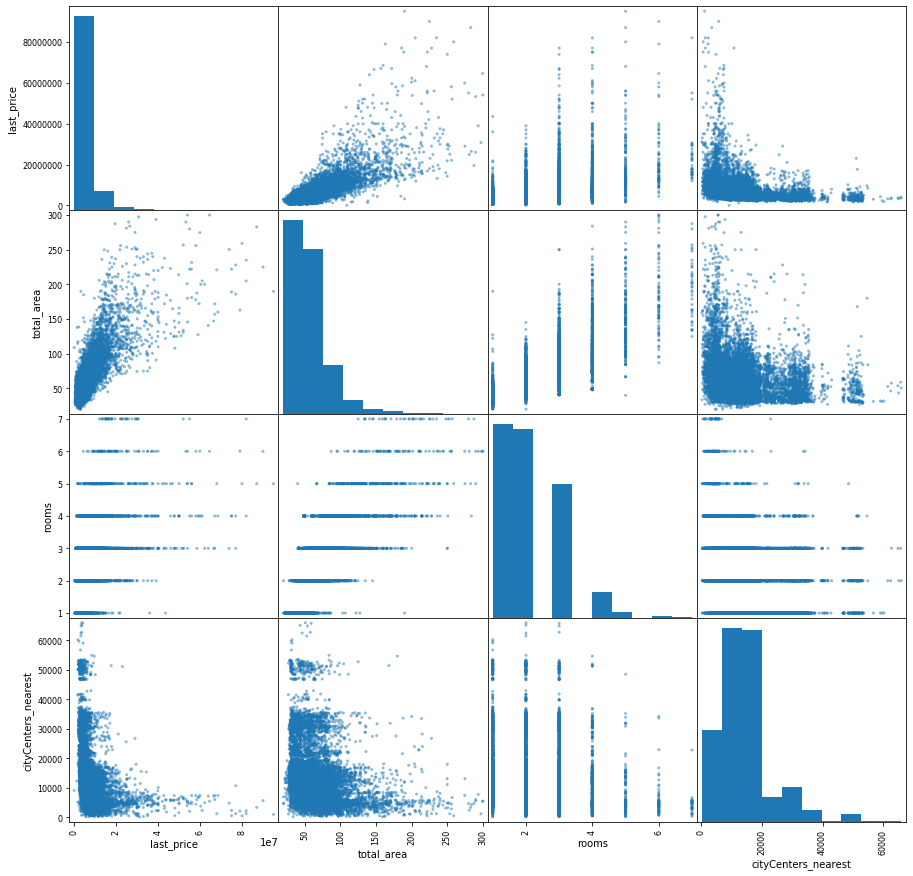

In [45]:
# <Построим диаграмму рассеяния>
pd.plotting.scatter_matrix(data[['last_price', 'total_area', 'rooms', 'cityCenters_nearest']], figsize=(15, 15))

Больше всего стоимость квартиры зависит от общей площади квартиры - чем больше площадь, тем больше стоит квартира

В меньшей степени стоимость квартиры зависит от количества комнат, но все равно зависит (корреляция - 0,48)

Относительно удаленности от центра получается обратная линейная зависимость - чем ближе к центру (соответственно, чем меньше расстояние), тем больше стоит квартира, но среди этих 3 факторов степень удаленности от центра имеет наименьшее влияние на стоимость квартиры

(0, 15000000)

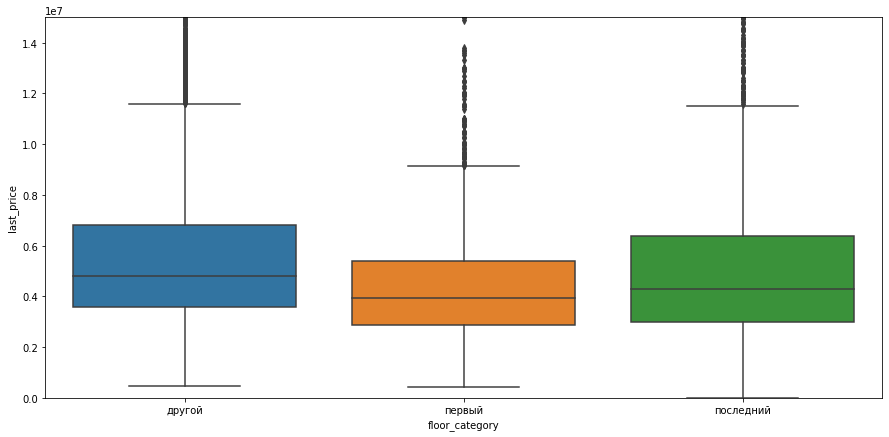

In [46]:
# <Строим ящики с усами>
plt.figure(figsize = (15,7))
ax = sns.boxplot(x = 'floor_category', y = 'last_price', data=data)
ax.set_ylim(0, 15_000_000)


Согласно ящику с усами, квартиры на первом этаже стоят меньше всего, квартиры на последнем этаже стоят чуть дороже квартир на первом, а квартиры на других этажах стоят больше и чем квартиры и на первом, и на последнем этаже.

(3000000, 8000000)

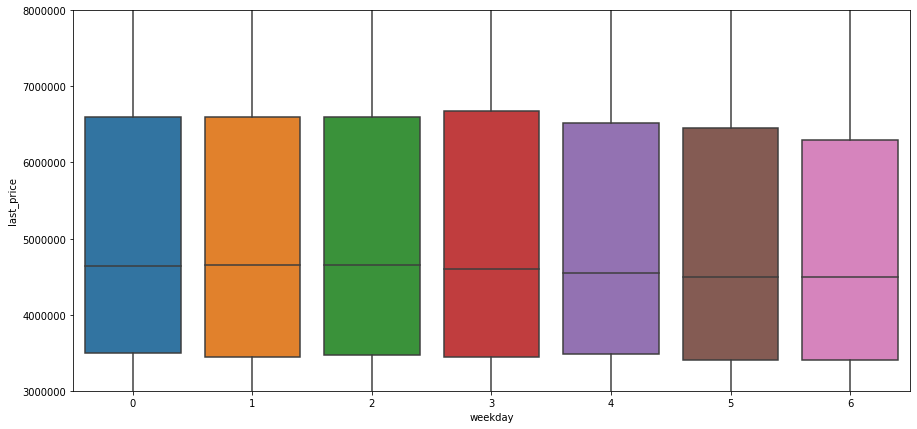

In [47]:
# Строим ящик с усами, чтобы посмотреть, как влияет weekday на стоимость квартиры 
plt.figure(figsize = (15,7))
ax = sns.boxplot(x = 'weekday', y = 'last_price', data=data)
ax.set_ylim(3000000, 8000000)

Медианная стоимость квартиры снижается к выходным, то есть в четверг выкладываются объявления с наибольшим межквартильным размахом, а в пт, сб и вс медианная стоимость квартиры снижается.
Больше всего медианная стоимость в пн, вт и ср.

(3000000, 7200000)

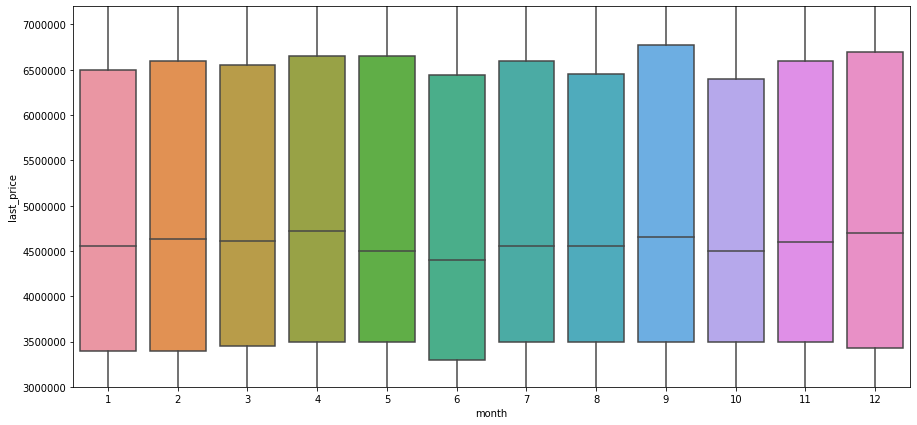

In [48]:
# Строим ящик с усами, чтобы посмотреть, как влияет month на стоимость квартиры 
plt.figure(figsize = (15,7))
ax = sns.boxplot(x = 'month', y = 'last_price', data=data)
ax.set_ylim(3000000, 7200000)

Меньше всего по медианной стоимости квартиры, которые были выложены в июне.
В июне размер первого квартиля ящика снижается.
Дороже всего квартиры в апреле, сентябре и декабре.
В сентябре и размер 4ого квартиля ящика увеличивается сильнее всего.

(0, 11000000)

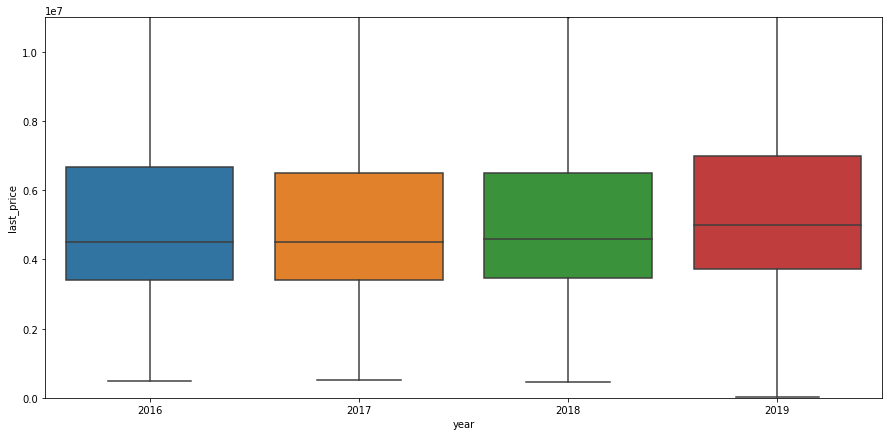

In [49]:
# Строим ящик с усами, чтобы посмотреть, как влияет year на стоимость квартиры 
plt.figure(figsize = (15,7))
ax = sns.boxplot(x = 'year', y = 'last_price', data=data)
ax.set_ylim(0, 11000000)

Медианная стоимость была наибольшей в 2019ом году, стоимость квартир начала расти.

5. Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите среди них населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце 'locality_name'.

In [50]:
# <Смотрим, сколько объявлений у городов в топ-10 с наибольшим количеством объявлений>

data_10_1 = data['locality_name'].value_counts(ascending = False).head(10).to_frame().reset_index()
data_10_1.columns = ['locality_name', 'locality_name_count']

data_10_2 = data.groupby(['locality_name']).agg({'price_m2':'median'}).round().astype(int).reset_index()
data_10_2.columns = ['locality_name', 'median_price_m2']

data_10 = data_10_1.merge(data_10_2, how = 'left')

data_10.columns = ['locality_name', 'locality_name_count', 'median_price_m2']
data_10 = data_10.sort_values(by = 'median_price_m2', ascending = False)
data_10

,locality_name,locality_name_count,median_price_m2
0,санкт-петербург,12630,103901
4,пушкин,301,100000
8,деревня кудрово,201,92539
6,поселок парголово,276,92202
1,поселок мурино,396,85620
2,поселок шушары,371,77500
5,колпино,296,74516
7,гатчина,264,67672
3,всеволожск,314,65595
9,выборг,178,58417


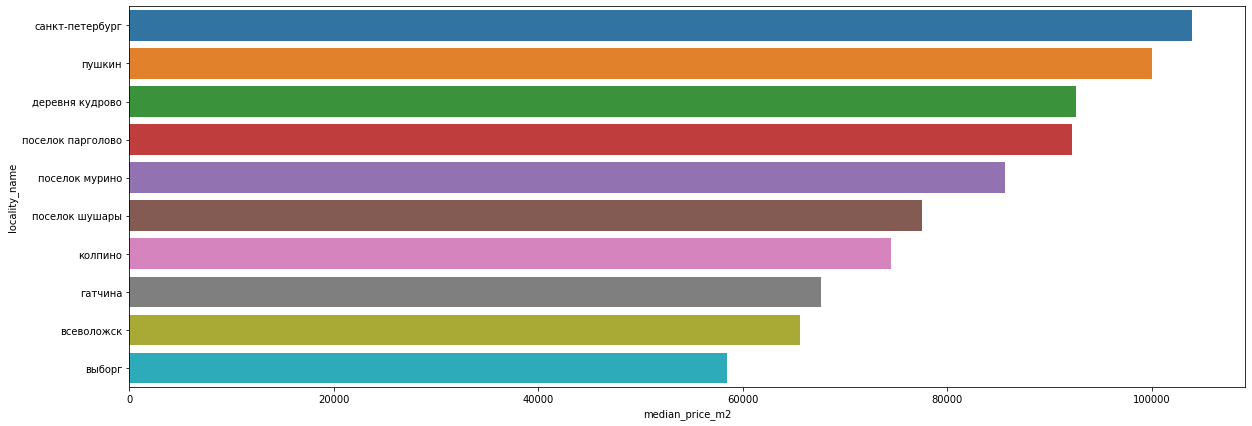

In [51]:
plt.figure(figsize = (20,7))
sns.barplot(data = data_10, x='median_price_m2', y='locality_name')

In [52]:
# <Поиск города с самой высокой стоимостью жилья >
data_10['median_price_m2'].max()

103901

Максимальная стоимость кв.метра - в Санкт-Петербурге (103901)

In [53]:
# <Поиск города с самой низкой стоимостью жилья >
data_10['median_price_m2'].min()

58417

Минимальная стоимость кв.метра - в Выборге (58417)

6. Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге ('locality_name'). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона.

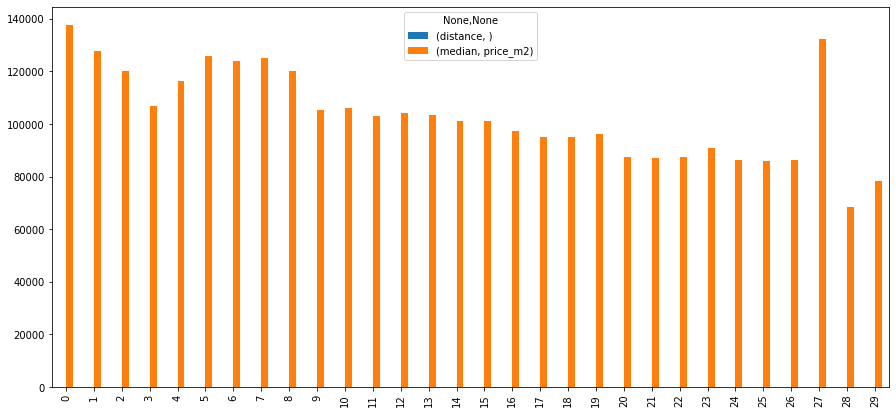

In [54]:
# <создаем новый датафрейм отдельно для Питера>
data_peter = data.query('locality_name == "санкт-петербург"').copy()

# <Отфильтровываем значения - маркеры в столбце cityCenters_nearest > 
data_peter = data_peter.query('cityCenters_nearest != 1000000')

# <Добавляем столбец с округленным количеством километров до центра>
data_peter['distance'] = (data_peter['cityCenters_nearest']/1000).round()

data_peter_price = data_peter.pivot_table(
    index = ['distance'], 
    values = ['price_m2'],
    aggfunc = ['median']
).reset_index()


data_peter_price.plot(
    kind = 'bar',
    figsize = (15,7))

На диаграмме видно, что с 8 км идет резкое снижение стоимости квадратного метра, таким образом, центром города считаем с 0 по 8 км.

7. Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков. Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?

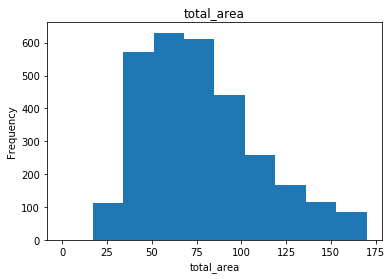

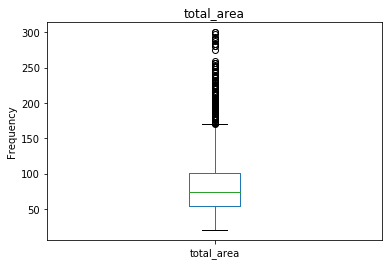

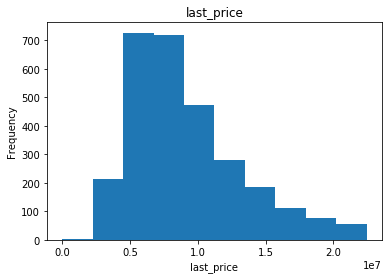

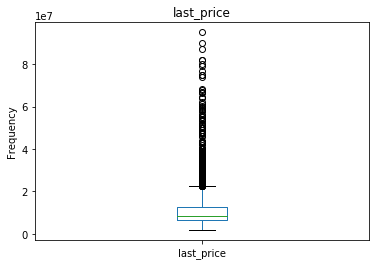

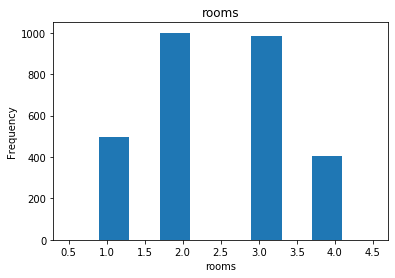

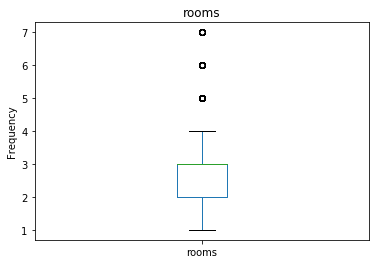

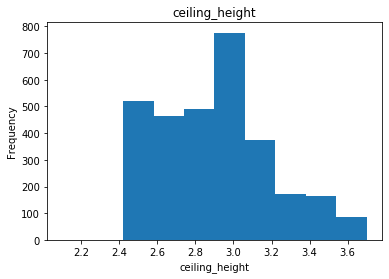

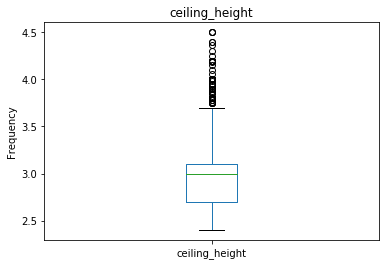

In [55]:
# <Берем сегмент квартир из датасета data_peter с фильтром по city_centers от 0 до 8>
data_peter_center = data_peter.query('distance <= 8')

hist_list_of_columns = ['total_area', 'last_price', 'rooms',  'ceiling_height'] 
for column in hist_list_of_columns:
    hist_boxplot(column, column, data_peter_center)

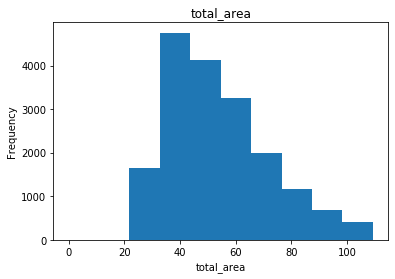

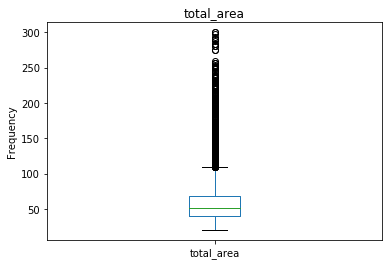

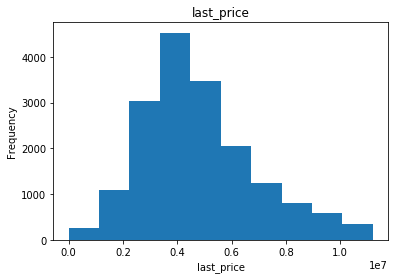

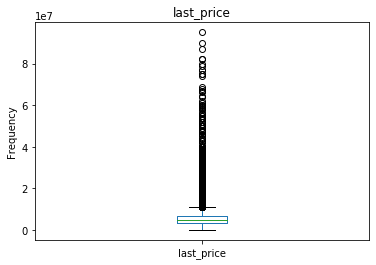

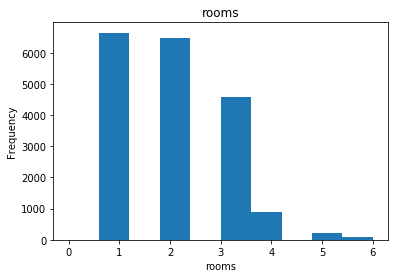

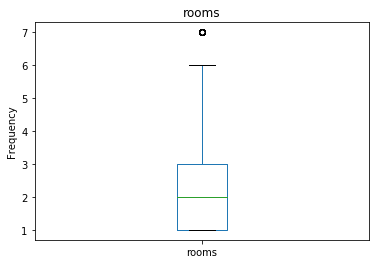

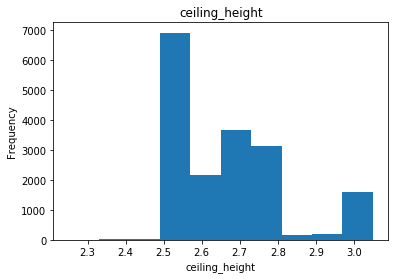

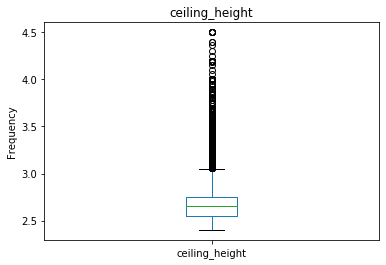

In [56]:
# <Берем все квартиры из датасета>

hist_list_of_columns = ['total_area', 'last_price', 'rooms',  'ceiling_height'] 
for column in hist_list_of_columns:
    hist_boxplot(column, column, data)

In [57]:
# <Сравниваем основные стат показатели по центру Питера и по датасету в целом>
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,living_k,kitchen_k,price_m2,weekday,month,year
count,18932.000000,1.893200e+04,18932.000000,18932.000000,18932.000000,18932.000000,18932.000000,18932.000000,18932.000000,18932.000000,...,18932.000000,18932.000000,18932.000000,16280.000000,18932.000000,18932.000000,18932.000000,18932.000000,18932.000000,18932.000000
mean,10.173885,5.915984e+06,58.134386,2.045320,2.699774,10.523241,33.349140,5.796905,10.119099,0.528523,...,464.837788,0.575322,512.303190,153.097789,0.562831,0.186699,97311.703607,2.555356,6.342225,2017.499155
std,5.630889,5.288381e+06,27.907711,0.997941,0.224440,6.440574,18.598208,4.759118,4.712934,0.762465,...,197.029343,0.868624,170.108514,169.657434,0.101145,0.068781,38196.980873,1.787670,3.438939,0.876175
min,0.000000,1.219000e+04,20.000000,1.000000,2.400000,2.000000,10.000000,1.000000,4.000000,0.000000,...,1.000000,0.000000,13.000000,1.000000,0.201194,0.025381,111.834862,0.000000,1.000000,2016.000000
25%,6.000000,3.450000e+06,40.000000,1.000000,2.550000,5.000000,18.500000,2.000000,7.000000,0.000000,...,453.000000,0.000000,503.000000,41.000000,0.493827,0.134146,76739.597333,1.000000,3.000000,2017.000000
50%,10.000000,4.600000e+06,51.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.000000,0.000000,...,453.000000,0.000000,503.000000,92.000000,0.566667,0.173077,94721.547500,3.000000,6.000000,2017.000000
75%,14.000000,6.550000e+06,67.700000,3.000000,2.750000,15.000000,41.900000,8.000000,11.500000,1.000000,...,453.000000,1.000000,503.000000,200.000000,0.634903,0.232432,113017.014868,4.000000,9.000000,2018.000000
max,50.000000,9.500000e+07,300.000000,7.000000,4.500000,29.000000,200.000000,27.000000,45.000000,2.000000,...,3190.000000,3.000000,1344.000000,1153.000000,0.900000,0.500000,500000.000000,6.000000,12.000000,2019.000000


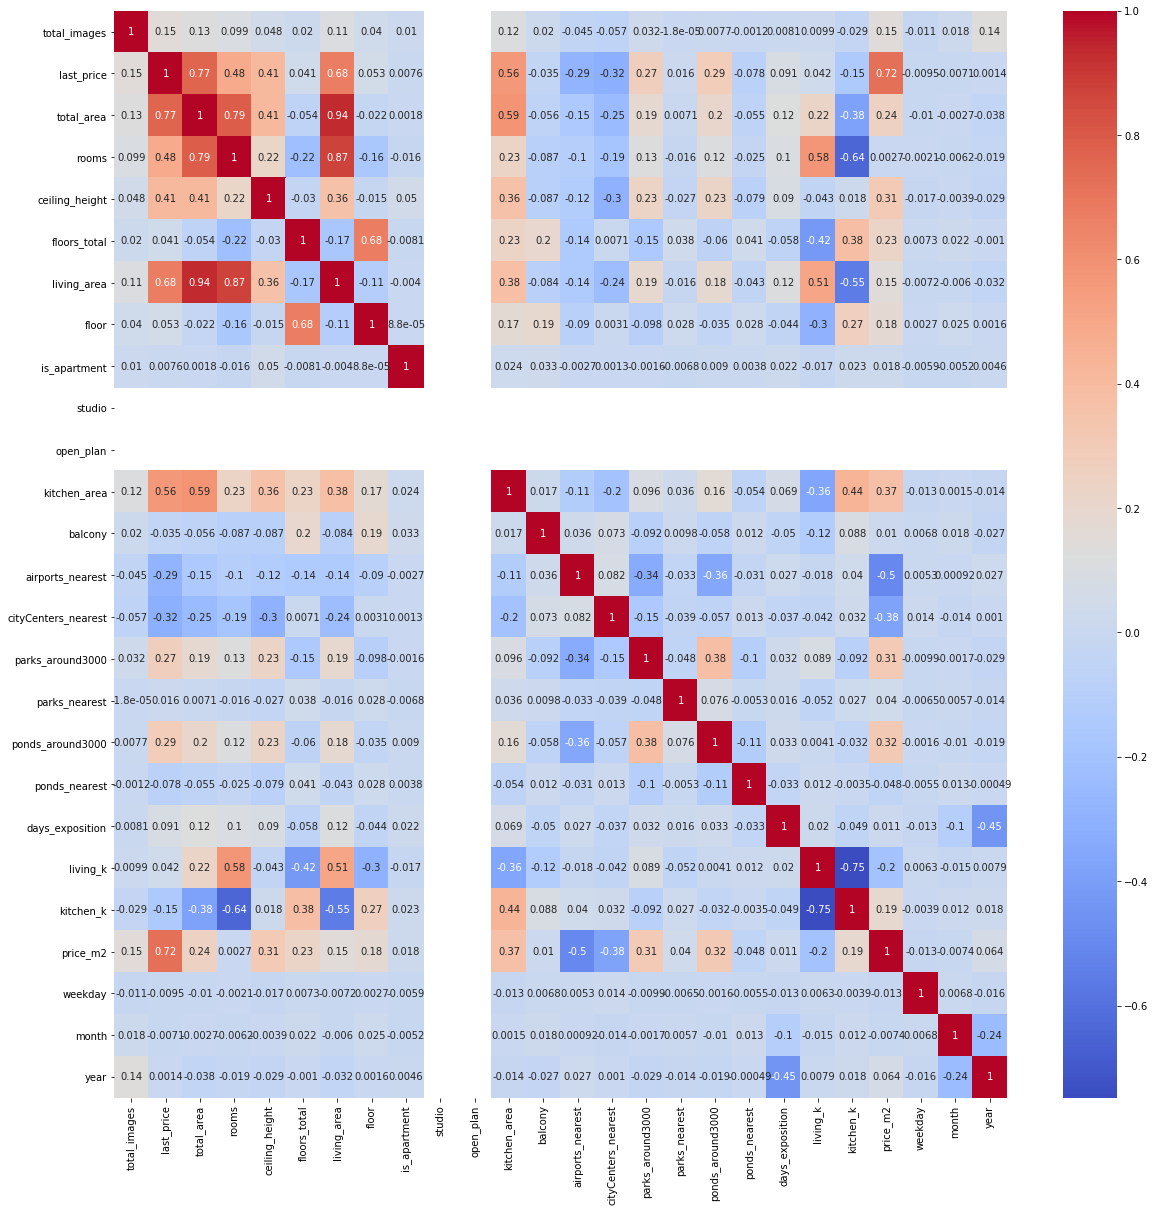

In [58]:
# <строим heatmap для визуализации корреляции>
plt.figure(figsize = (20,20))
sns.heatmap(data.corr(), annot = True, cmap= 'coolwarm')

In [59]:
# <Сравниваем основные стат показатели по центру Питера и по датасету в целом>
data_peter_center.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,ponds_around3000,ponds_nearest,days_exposition,living_k,kitchen_k,price_m2,weekday,month,year,distance
count,3128.000000,3.128000e+03,3128.000000,3128.000000,3128.000000,3128.000000,3128.000000,3128.000000,3128.000000,3128.000000,...,3128.000000,3128.000000,2594.000000,3128.000000,3128.000000,3128.000000,3128.000000,3128.000000,3128.000000,3128.000000
mean,10.428708,1.148034e+07,83.709949,2.693095,2.942848,7.498721,49.494754,4.380754,13.132813,0.286765,...,1.240409,482.915921,186.061681,0.580143,0.171355,133097.833049,2.513427,6.358376,2017.409527,5.031650
std,5.979287,9.551261e+06,42.220600,1.241456,0.334956,4.339229,28.651241,3.184725,6.701890,0.604792,...,1.075531,222.508315,192.815989,0.108331,0.074920,53754.600763,1.738725,3.381852,0.889191,1.977639
min,0.000000,1.800000e+06,20.000000,1.000000,2.400000,2.000000,10.000000,1.000000,4.000000,0.000000,...,0.000000,22.000000,3.000000,0.201194,0.025381,15345.268542,0.000000,1.000000,2016.000000,0.000000
25%,6.000000,6.300000e+06,54.000000,2.000000,2.700000,5.000000,30.000000,2.000000,8.500000,0.000000,...,0.000000,355.750000,52.000000,0.514181,0.119035,99253.731343,1.000000,3.000000,2017.000000,4.000000
50%,10.000000,8.500000e+06,74.000000,3.000000,3.000000,6.000000,43.350000,4.000000,11.200000,0.000000,...,1.000000,503.000000,117.000000,0.593750,0.151966,120904.676719,3.000000,6.000000,2017.000000,5.000000
75%,15.000000,1.276250e+07,100.400000,3.000000,3.100000,9.000000,61.025000,5.000000,15.500000,0.000000,...,2.000000,571.250000,257.750000,0.658626,0.204554,150000.000000,4.000000,9.000000,2018.000000,7.000000
max,50.000000,9.500000e+07,300.000000,7.000000,4.500000,28.000000,200.000000,25.000000,45.000000,2.000000,...,3.000000,1270.000000,1150.000000,0.898305,0.500000,500000.000000,6.000000,12.000000,2019.000000,8.000000


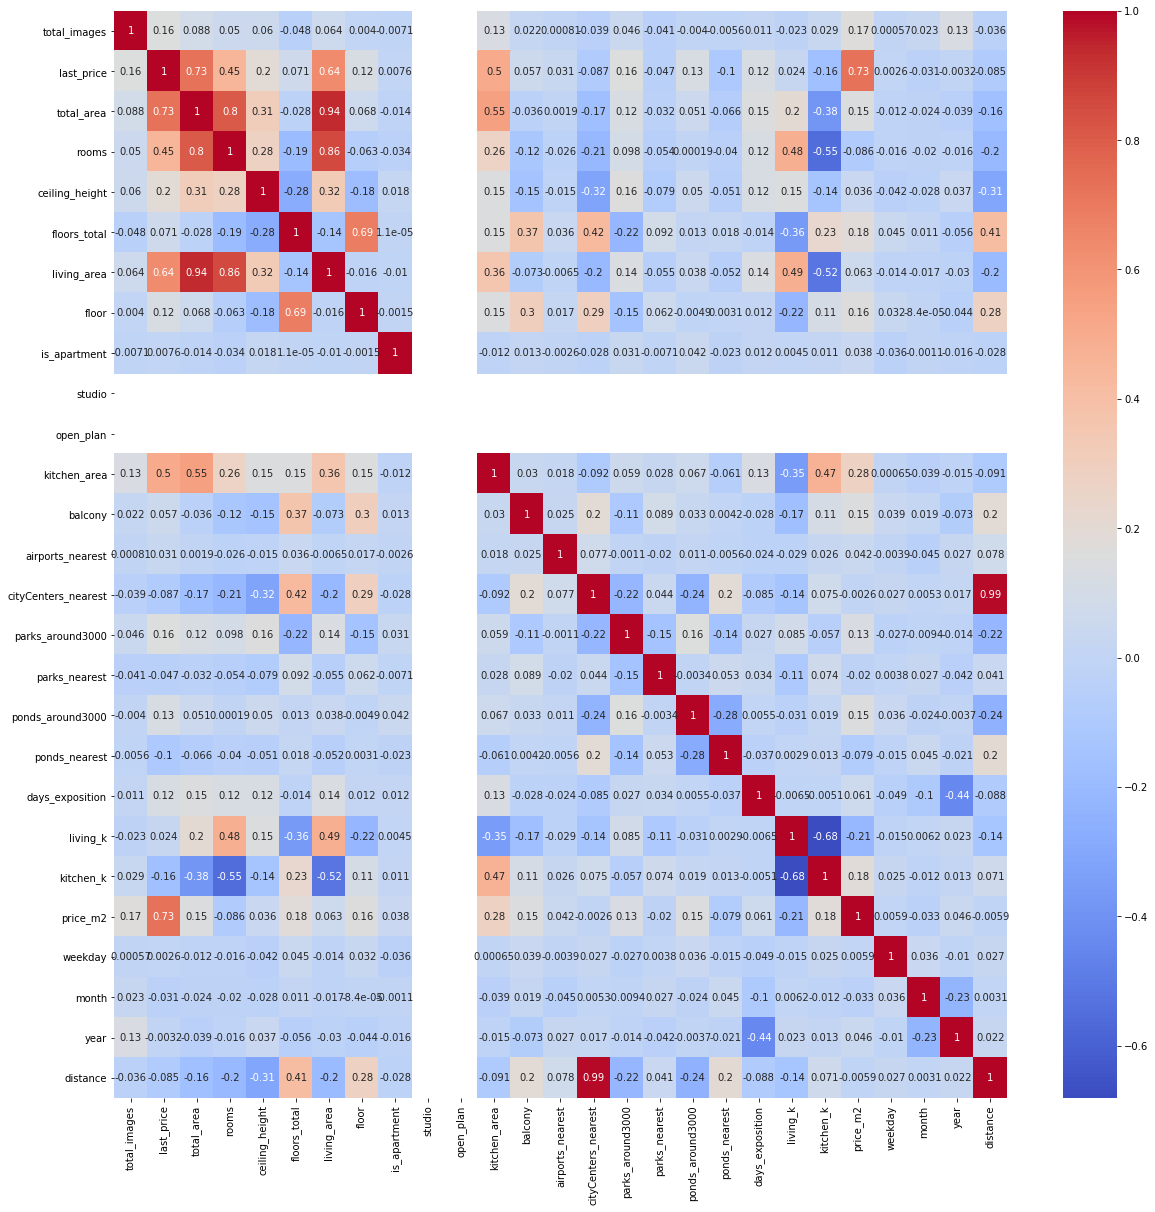

In [60]:
# <строим heatmap для визуализации корреляции>
plt.figure(figsize = (20,20))
sns.heatmap(data_peter_center.corr(), annot = True, cmap= 'coolwarm')

При сравнении квартир в центре и квартир в целом по датасету по столбцам 
total_area, last_price, rooms,  ceiling_height можно сделать следующие выводы:
- Общая площадь квартир в центре по медиане (74) больше на 23 метра, чем медианная площадь квартиры в целом (51)
- Средняя стоимость квартир в центре почти в 2 раза больше, чем в целом датасете (8.5 и 4.6. млн)
- В центре преобладают квартиры от 1 до 4 комнат, причем в большей степени продаются 2 и 3 комнатные. В целом датасете в основном продаются квартиры от 1 до 4 комнат, но 4-комнатных квартир практически нет
- В центре высота потолков по медиане - 3 метра, а в целом по датасету - меньше - около 2,65 метра

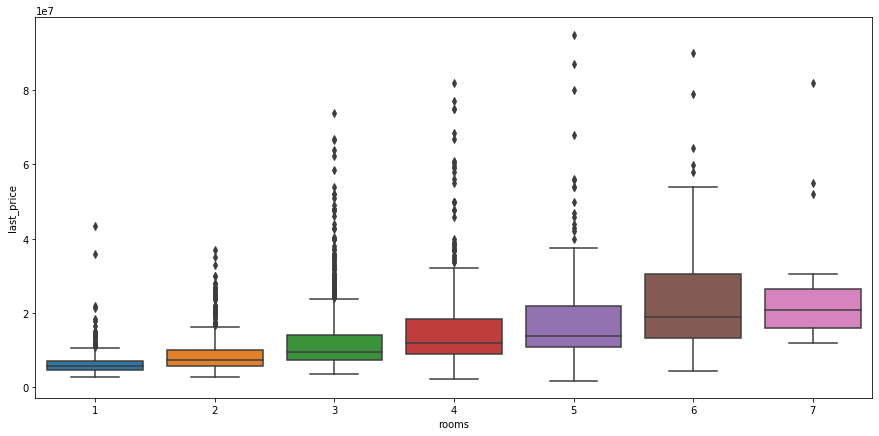

In [61]:
# Строим ящик с усами, чтобы посмотреть, как влияет число комнат, 
# этаж, удалённость от центра, дата размещения объявления на стоимость квартиры 

plt.figure(figsize = (15,7))
ax = sns.boxplot(x = 'rooms', y = 'last_price', data=data_peter_center)

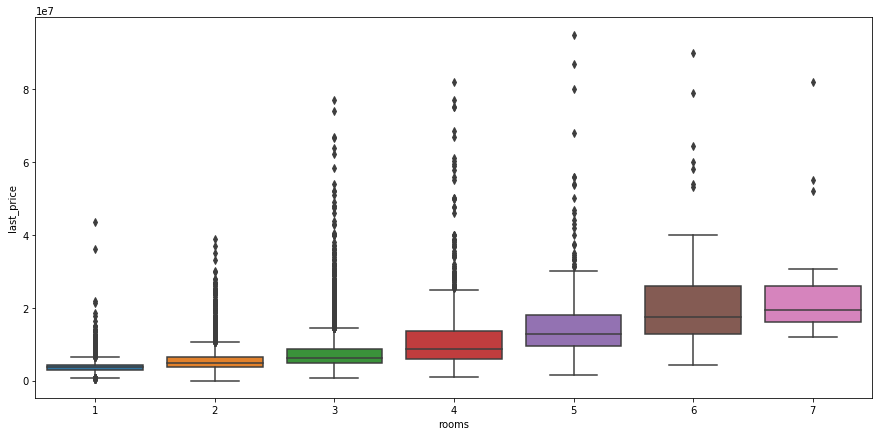

In [62]:
plt.figure(figsize = (15,7))
ax = sns.boxplot(x = 'rooms', y = 'last_price', data=data)

Корреляция по количеству комнат в целом по датасету и по центру Питера - приблизительно одинакова, однако в центре Питера 6-комнатные квартиры часто стоят дороже 7-комнатных

(0, 10000000)

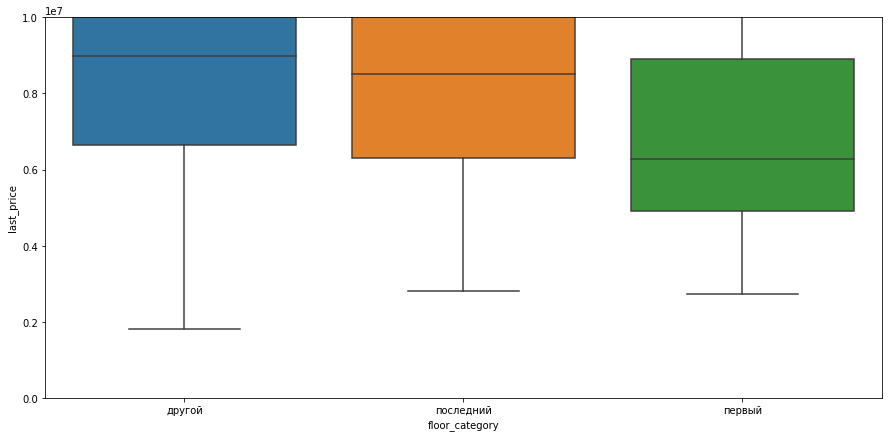

In [63]:
plt.figure(figsize = (15,7))
ax = sns.boxplot(x = 'floor_category', y = 'last_price', data=data_peter_center)
ax.set_ylim(0, 10000000)

(0, 10000000)

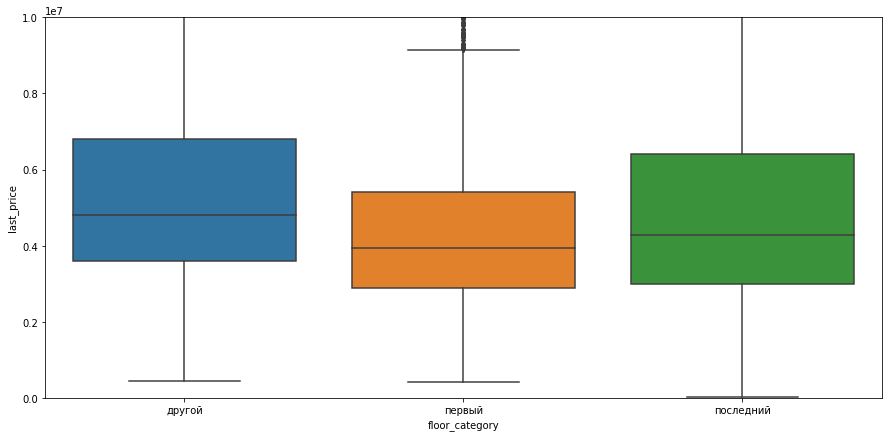

In [64]:
plt.figure(figsize = (15,7))
ax = sns.boxplot(x = 'floor_category', y = 'last_price', data=data)
ax.set_ylim(0, 10000000)

Корреляция относительно категории этажа: заметно, что в центре Питера намного меньше стоят квартиры на первом этаже, а по всему датасету квартиры на первом и последнем этаже стоят приблизительно одинаково

In [65]:
# <Сравниваем корреляцию по центру Питера и по датасету в целом>
data[['price_m2', 'cityCenters_nearest', 'weekday', 'month', 'year']].corr()

,price_m2,cityCenters_nearest,weekday,month,year
price_m2,1.000000,-0.378161,-0.013135,-0.007421,0.064340
cityCenters_nearest,-0.378161,1.000000,0.013515,-0.014166,0.001002
weekday,-0.013135,0.013515,1.000000,0.006838,-0.015652
month,-0.007421,-0.014166,0.006838,1.000000,-0.241966
year,0.064340,0.001002,-0.015652,-0.241966,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FC85DF1188>,
      dtype=object)

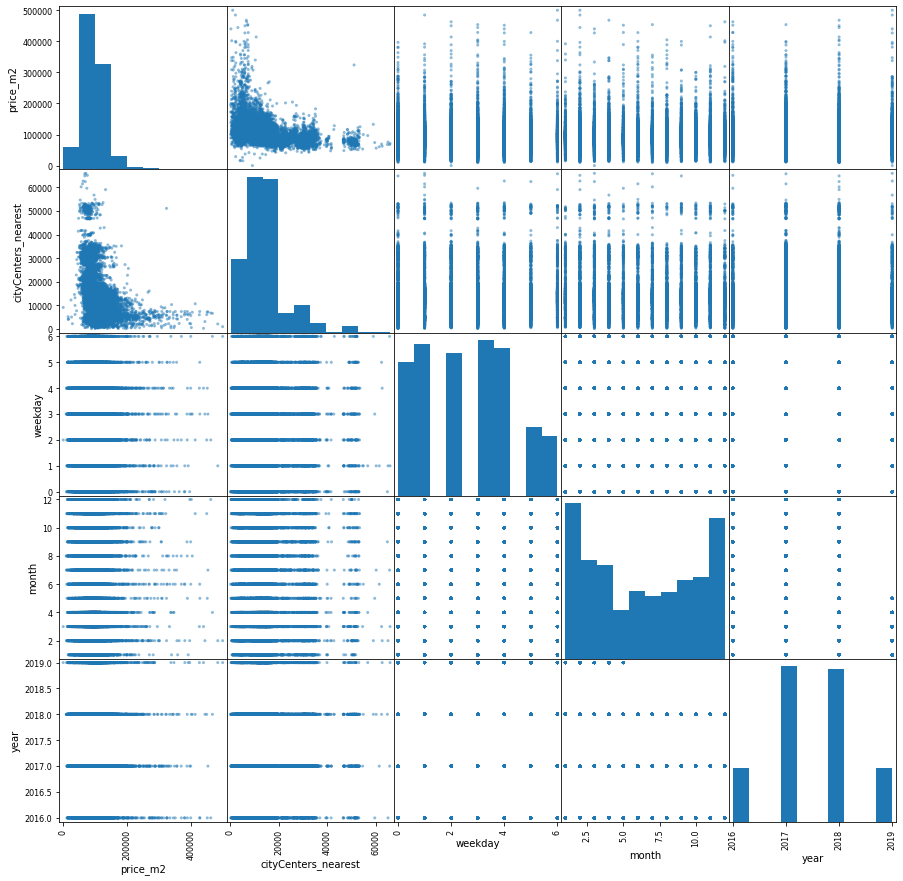

In [66]:
# <Построим диаграмму рассеяния>
pd.plotting.scatter_matrix(data[['price_m2', 'cityCenters_nearest', 'weekday', 'month', 'year']], figsize=(15, 15))

In [67]:
# <Сравниваем корреляцию по центру Питера и по датасету в целом>
data_peter_center[['price_m2', 'cityCenters_nearest','weekday', 'month', 'year']].corr()

,price_m2,cityCenters_nearest,weekday,month,year
price_m2,1.000000,-0.002648,0.005913,-0.032531,0.045909
cityCenters_nearest,-0.002648,1.000000,0.027181,0.005318,0.016721
weekday,0.005913,0.027181,1.000000,0.035538,-0.010280
month,-0.032531,0.005318,0.035538,1.000000,-0.231524
year,0.045909,0.016721,-0.010280,-0.231524,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FC85B60808>,
      dtype=object)

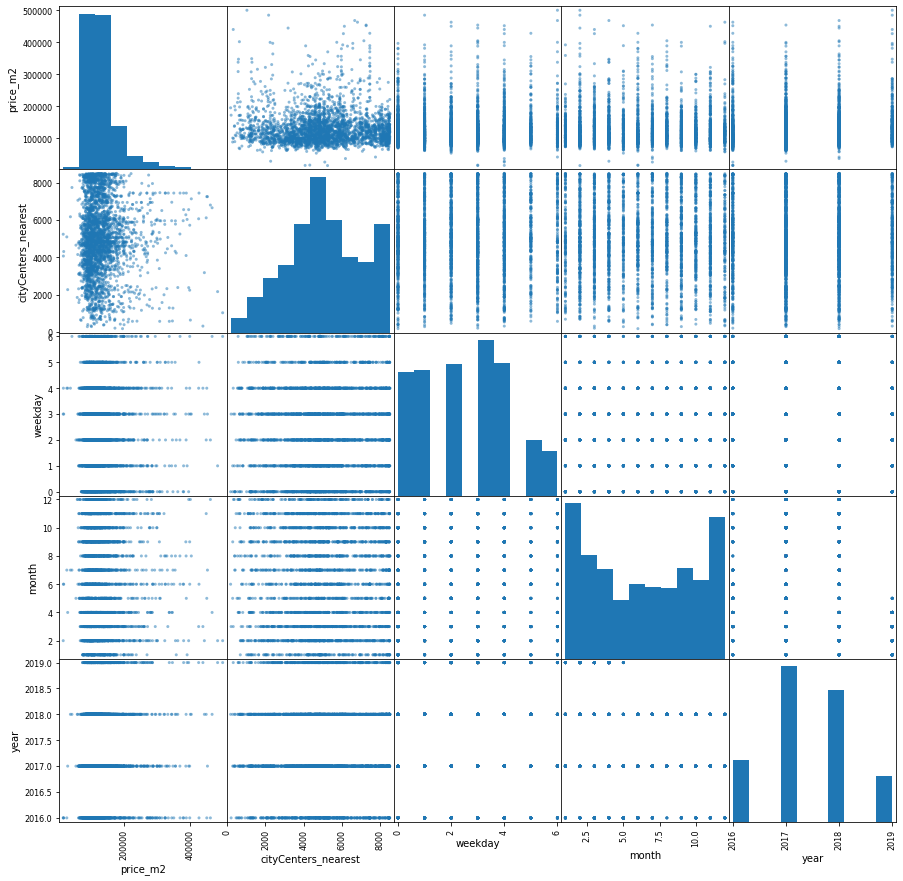

In [68]:
pd.plotting.scatter_matrix(data_peter_center[['price_m2', 'cityCenters_nearest', 'weekday', 'month', 'year']], figsize=(15, 15))

Выводы по корреляции:
- Заметно, что цена квадратного метра по всему датасету значильно (на -0,5) зависит от расстояния до центра, а квартиры в центре Питера почти не зависят от удаленности, потому что находятся в 8 км от центра и такое значение удаленности уже не играет роли при покупке квартиры.
- У датасета в целом цена за кв.м. зависит более значительно (на 0,01) от дня недели, в то время как у датасета по центру Петербурга цена от дня недели практически не зависит (корреляция: 0,006).
- Цена кв.м. зависит от месяца подачи заявления больше в центре Петербурга (-0,03  в сравнении с 0,007 в целом по датасету)
- От года подачи заявления цены кв.м. в центре Питера и по всему датасету зависят приблизительно одинаково (0,06 и 0,04))

### Вывод <a id="analisis_total"></a>

Можно сказать, что продажи квартиры прошли быстро, если объявление закрыто меньше, чем за 45 дней и медленно - если объявление закрыто за 239-530 дней.

Максимальная стоимость кв.метра - в Санкт-Петербурге (103906.25)

Минимальная стоимость кв.метра - в Выборге (58417.02)

Если квартира находится на расстоянии от центра в 8 км м меньше, то ее можно считать квартирой в центре города.

Сравнение квартир в центре и по всему датасету:

- Средняя площадь квартир в центре больше на 23 метра, чем площадь квартиры по датасету в целом.
- Средняя стоимость квартир в центре почти в 2 раза больше, чем в целом датасете.
- В центре преобладают квартиры от 1 до 4 комнат, в целом датасете 4-комнатных квартир практически нет.
- В центре высота потолков по медиане - 3 метра, а в целом по датасету - меньше - около 2,65 метра

Корреляция:
- корреляция по количеству комнат в целом по датасету и по центру Питера - приблизительно одинакова, однако в центре Питера 6-комнатные квартиры часто стоят дороже 7-комнатных
- корреляция относительно категории этажа: в центре Питера меньше стоят квартиры на первом этаже, а по всему датасету квартиры на первом и последнем этаже стоят приблизительно одинаково.
- цена квадратного метра по всему датасету сильно зависит от расстояния до центра, а квартиры в центре Питера почти не зависят от удаленности, потому что находятся в 8 км от центра и такое значение удаленности уже не играет роли при покупке квартиры.
- у датасета в целом цена за кв.м. зависит более значительно от дня недели, чем у квартир ц центре Петербурга
- цена кв.м. зависит от месяца подачи заявления больше в центре Петербурга, чем у датасета в целом
- от года подачи заявления цены кв.м. в центре Питера и по всему датасету зависят приблизительно одинаково (0,06 и 0,04)

### Шаг 5. Общий вывод <a id="total"></a>

Всего 23699 строк в таблице. Каждая строка содержит информацию о продаваемой в Санкт-Петербурге квартире. В этой части проекта выявили пропуски в 14 столбцах.
В зависимости от того, насколько важны данные для ответов на вопросы, заполняли пропуски медианой или медианой, посчитанной на основе группировки по коррелирующему столбцу. Заключительная проверка показала наличие пропусков только в двух столбцах:cityCenters_neares И days_exposition в таблице data.

Заменили тип данных float на int в столбцах, чтобы не получалось 1.5 землекопа (балкона), и для увеличения точности расчетов.

Автоматический поиск дубликатов не показал, вручную были выявлены и удалены дубликаты с буквами Ё и Е в слове "поселок".
Скорее всего дубликаты в столбцах были получены вследствие ручного набора данных, а не выбора значений из выпадающих списков.

Добавили столбцы price_m2, to_datetime(), floor_category, (living_k) и (kitchen_k) для дальнейших расчетов.

Можно сказать, что продажи квартиры прошли быстро, если объявление закрыто меньше, чем за 45 дней и медленно - если объявление закрыто за 239-530 дней.

Максимальная стоимость кв.метра - в Санкт-Петербурге (103906.25)
Минимальная стоимость кв.метра - в Выборге (58417.02)

Если квартира находится на расстоянии от центра в 8 км, то ее можно считать квартирой в центре города.

Сравнение квартир в центре и в датасете в целом:
- средняя площадь квартир в центре больше на 23 метра, чем площадь квартир в целом.
- средняя стоимость квартир в центре почти в 2 раза больше, чем в целом.
- в центре больше 1-4 комнатных квартир, в целом датасете 4-комнатных квартир практически нет.
- в центре высота потолков - 3 метра, а в целом по датасету - меньше - около 2,65 метров

Корреляция:
- зависимость цены от количества комнат в целом по датасету и по центру Питера - приблизительно одинакова
- в центре Питера квартиры на первом этаже стоят меньше, а по всему датасету квартиры на первом и последнем этаже стоят приблизительно одинаково.
- цена квадратного метра по всему датасету сильно зависит от расстояния до центра, а квартиры в центре Питера почти не зависят от удаленности
- у датасета в целом цена за кв.м. зависит более значительно от дня недели, чем у квартир в центре Петербурга
- цена кв.м. зависит от месяца подачи заявления больше в центре Петербурга, чем у датасета в целом
- от года подачи заявления цены кв.м. в центре Питера и по всему датасету зависят приблизительно одинаково (0,06 и 0,04)